In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.0/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 1.6/150.0 MB 2.6 MB/s eta 0:00:57
    --------------------------------------- 2.1/150.0 MB 2.6 MB/s eta 0:00:58
    --------------------------------------- 2.9/150.0 MB 2.8 MB/s eta 0:00:53
    --------------------------------------- 3.7/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 4.5/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 5.2/150.0 MB 3.2 MB/s eta 0:00:45
   - -------------------------------------- 6.3/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 7.1/150.0 MB 3.5 MB/s eta 0:00:42
   -- ------------------------------------- 7.9/150.0 MB 3.5 MB/s eta 0:00:41
   -- ------------------------------------- 8.7/150.0 MB 3.5 MB/s eta 0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [17]:
from sklearn.model_selection import train_test_split 

X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,       # number of boosting rounds
    learning_rate=0.1,      # shrinkage rate
    max_depth=3,            # tree depth
    subsample=0.8,          # subsample rate per tree
    colsample_bytree=0.8,   # feature subsample per tree
    random_state=42,
    eval_metric='logloss'   # suppress label encoder warning
)

In [19]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
from sklearn.metrics import accuracy_score,classification_report

y_pred=xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



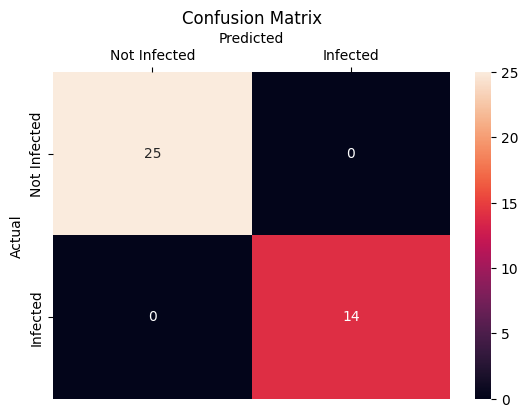

Accuracy: 1.00
Precision: 1.00
Sensitivity (Recall): 1.00
F1-Score: 1.00


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=xgb_model.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected', 'Infected'],
           yticklabels=['Not Infected', 'Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Extract values from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")